# Download house pricing data from Kaggle
https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [ ]:
# import files class to upload files to colab
from google.colab import files

In [ ]:
# upload kaggle.json
files.upload()

{}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Download house price dataset and unzip to the corresponding folder
! kaggle datasets download 'shivachandel/kc-house-data'
! mkdir house
! unzip kc-house-data.zip  -d house

kc-house-data.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘house’: File exists
Archive:  kc-house-data.zip
replace house/kc_house_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


# Linear Regression (sklearn)

In [ ]:
!pip install scikit-learn=="1.1.1"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read data
df = pd.read_csv('house/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#set X and Y
size = df['sqft_living']
price = df['price']

In [ ]:
#convert to numpy arrays
X = np.asarray(size).reshape(-1, 1) #X must be a 2D array
Y = np.asarray(price)

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290, 1) (4323, 1)


In [ ]:
#train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions and estimate error
from sklearn.metrics import mean_squared_error
preds = lr.predict(x_test)
mean_squared_error(y_test, preds)

61940787124.62475

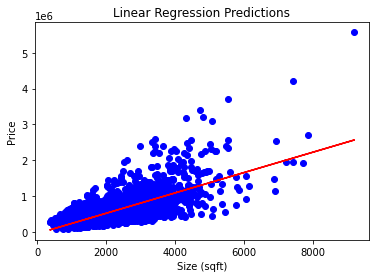

In [ ]:
#Visualizing predictions
plt.scatter(x_test, y_test, color= 'blue')
plt.plot(x_test, preds, color = 'red')
plt.title ("Linear Regression Predictions")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()

# TO DO! 
1. Train algorithm using sqft, number of bedroom and year build as features.
(hint: normalize features https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. Estimate how much the algorithm improved.

In [ ]:
# add your code
#set X and Y
size = df[['sqft_living', 'bedrooms','yr_built']]
price = df['price']

#convert to numpy arrays
X = np.asarray(size)
Y = np.asarray(price)

#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290, 3) (4323, 3)


In [ ]:
#train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#make predictions and estimate error
from sklearn.metrics import mean_squared_error
preds = lr.predict(x_test)
error = mean_squared_error(y_test, preds)
print("The test set's MSE reduction is: ",61940787124.62475 - error)

The test set's MSE reduction is:  5982864403.930298


# Linear Regression (Custom)

In [ ]:
#set X and Y
size = df['sqft_living']
price = df['price']

#convert to numpy arrays
X = np.asarray(size)
Y = np.asarray(price)

#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290,) (4323,)


In [ ]:
# set m_train
m_train = len(x_train)
print('the length of the train datasets is equal to {}'.format(m_train))

# TO DO
#set m_test
m_test = len(x_test)
print('the length of the test datasets is equal to {}'.format(m_test))

the length of the train datasets is equal to 17290
the length of the test datasets is equal to 4323


In [ ]:
# TO DO
# Add one more column to x_train, x_test as x0
# (hint) you can use np.ones and/or np.stack, np.concatenate
x_train = np.concatenate([np.ones(m_train).reshape(-1,1), x_train.reshape(-1,1)], axis=1)
x_test = np.concatenate([np.ones(m_test).reshape(-1,1), x_test.reshape(-1,1)], axis=1)

### Gradient Descent

1. Estimate the cost function

$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)^2$$

where the prediction given by the linear model
$$ \hat{y} = bx_0 + wx_1$$, and $$x_0 = 1$$.

2. Simultaneously update all parameters

$$ w := w - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)x_1^{(i)} $$

$$ b := b - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)$$

### Gradient Descent

1. Estimate the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0x_0 + \theta_1 x_1$$, and $$x_0 = 1$$.

2. Simultaneously update all parameters

$$ \theta_j := \theta_j - \lambda \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$

### Vectorization example

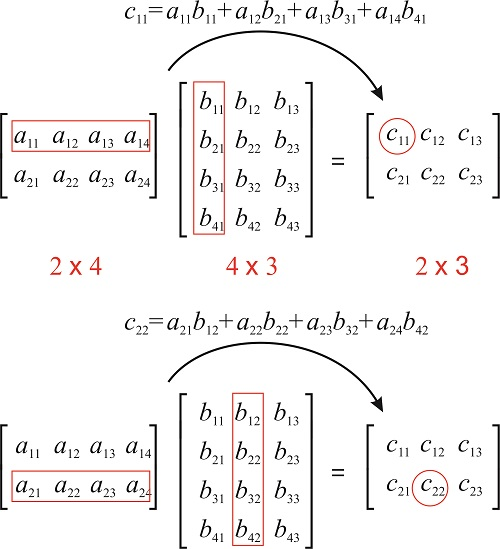

In [ ]:
# W is b, w1, w2, w3
# X is x0, x1, x2, x3 where x0 = 1
W = np.array([[0.1, 0.2, 0.3, 0.4]])
X = np.array([[ 1. , -0.55395019, -0.39003389, -1.05018286],
              [ 1. , -0.32648492, -0.39003389,  0.30645855],
              [ 1. , -1.07387079, -0.39003389,  0.54387079]])

In [ ]:
#for approach
y_hat = np.zeros((3, 1))
for i in range(len(X)):
  for j in range(len(X[i])):
	  y_hat[i,:] += X[i][j]*W[0,j]
y_hat

array([[-0.54787335],
       [ 0.04027627],
       [-0.01423601]])

In [ ]:
#MatMul approach
y_hat = np.dot(X,W.T)
y_hat

array([[-0.54787335],
       [ 0.04027627],
       [-0.01423601]])

In [ ]:
def costFunction(X, y, theta, m):
    """
    Computes cost for linear regression. 
    X : feature vector, shape (m x n+1)
    y : labels (i.e., price), shape (m, )
    theta : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    # TO DO !!!
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  
    return J

In [ ]:
def gradientDescent(X, y, theta, m, l, epochs):
    """
    Updates parameters. 
    X : feature vector, shape (m x n+1)
    y : labels (i.e., price), shape (m, )
    theta : parameters for the linear regression, shape (n+1, )
    m : data legth
    l : learning rate
    epochs : number of iterations
    
    returns
    -------
    thetas : updated parameters
    cost_values : list of Js to check the training progress
    """
    theta = np.copy(theta)
    cost_values = []
    
    for i in range(epochs):
        # TO DO
        # 1. update theta
        # 2. save J to cost values
        theta = theta - (l / m) * (np.dot(X, theta) - y).dot(X)
        cost_values.append(costFunction(X, y, theta, m))
        # =====
    return theta, cost_values

In [ ]:
# initialize variables
np.random.seed(0)
theta = np.random.rand(2)*0.1 # TO DO set random small values
epochs = 1000
l = 0.01

In [ ]:
mean = np.mean(x_train, axis = 0)
sigma = np.std(x_train, axis = 0)

In [ ]:
# normalize 
def normalization(x, mean, sigma):

    x_norm = np.ones_like(x)

    # TO DO
    for i in range(1,x_train.shape[1]):
      x_norm[:,i] = (x[:,i] - mean[i]) / sigma[i]
    
    # =====
    return x_norm

In [ ]:
x_norm = normalization(x_train, mean, sigma)
thetas, cost_values = gradientDescent(x_norm, y_train, theta, m_train, l, epochs)
#print(np.round(thetas[0],2),np.round(thetas[1],2))
assert np.round(thetas[0],2) == 542776.4
assert np.round(thetas[1],2) == 262153.53

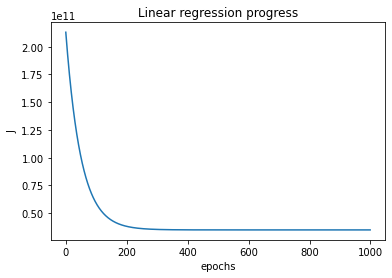

In [ ]:
plt.plot(cost_values)
plt.title ("Linear regression progress")
plt.xlabel("epochs")
plt.ylabel("J")
plt.show()

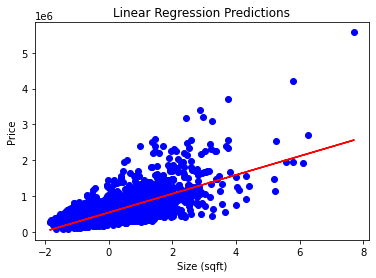

In [ ]:
#Visualizing predictions
x_test_norm = normalization(x_test, mean, sigma)
preds = np.dot(x_test_norm,thetas)
plt.scatter(x_test_norm[:,1], y_test, color= 'blue')
plt.plot(x_test_norm[:,1], preds, color = 'red')
plt.title ("Linear Regression Predictions")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()

# Multivariate Linear Regression (Custom)

1. Train custom LR algorithm using sqft, number of bedroom and year build as features.

2. Follow similar procedure with the sqft feature including bias (x0)

3. Change parameter size accordingly (n, ). Hint do not reshape x_train during concatenation.

4. How much does your alogrithm think that the 20th house in the test dataset cost? (Hint thetas should be around [542776.40442377, 312955.5479766 , -52340.61575242, -70637.33360148])

### Gradient Descent

1. Estimate the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)^2$$

where the prediction given by the linear model
$$ \hat{y} = bx_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$, and $$x_0 = 1$$.

2. Simultaneously update all parameters

$$ w_j := w_j - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)x_j^{(i)} $$

$$ b := b - \lambda \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)}\right)$$

In [ ]:
df[['sqft_living', 'bedrooms','yr_built', 'price']]

,sqft_living,bedrooms,yr_built,price
0,1180,3,1955,221900.0
1,2570,3,1951,538000.0
2,770,2,1933,180000.0
3,1960,4,1965,604000.0
4,1680,3,1987,510000.0
...,...,...,...,...
21608,1530,3,2009,360000.0
21609,2310,4,2014,400000.0
21610,1020,2,2009,402101.0
21611,1600,3,2004,400000.0


In [ ]:
#set X and Y
size = df[['sqft_living', 'bedrooms','yr_built']]
price = df['price']

#convert to numpy arrays
X = np.asarray(size)
Y = np.asarray(price)

#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(17290, 3) (4323, 3)


In [ ]:
# initialize variables
np.random.seed(0)
theta = np.random.rand(4)*0.1 # TO DO set random small values
epochs = 1000
l = 0.01

In [ ]:
x_train = np.concatenate([np.ones(m_train).reshape(-1,1), x_train], axis=1)
x_test = np.concatenate([np.ones(m_test).reshape(-1,1), x_test], axis=1)

In [ ]:
mean = np.mean(x_train, axis = 0)
sigma = np.std(x_train, axis = 0)

In [ ]:
x_norm = normalization(x_train, mean, sigma)
thetas, cost_values = gradientDescent(x_norm, y_train, theta, m_train, l, epochs)

In [ ]:
x_norm

array([[ 1.        , -0.55395019, -0.39003389, -1.05018286],
       [ 1.        , -0.32648492, -0.39003389,  0.30645855],
       [ 1.        , -1.07387079, -0.39003389,  0.54387079],
       ...,
       [ 1.        ,  0.30175248, -0.39003389,  0.23862648],
       [ 1.        ,  0.31258416,  0.67029408,  0.23862648],
       [ 1.        ,  0.32341584,  0.67029408, -0.33794612]])

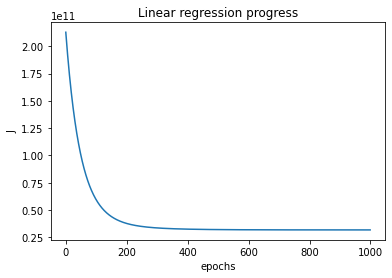

In [ ]:
plt.plot(cost_values)
plt.title ("Linear regression progress")
plt.xlabel("epochs")
plt.ylabel("J")
plt.show()

In [ ]:
# TO DO.
# estimate the test error
# Hint: Normalize first the test set then use the costFunction
x_norm_test = normalization(x_test, mean, sigma)
test_error = costFunction(x_norm_test, y_test, thetas, len(y_test))
#######
assert test_error == 27971339477.682686

In [ ]:
#TO DO
# Estimate the price for the 21st house in the test set
pred = np.dot(x_norm_test[20],thetas)
print('The price prediction for the 21st house in the test set is {}'.format(pred)) #should be arround 416454.59 dollars

The price prediction for the 21st house in the test set is 416454.5906537639
